## This is a tool to process output files from CMG

In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt   
from matplotlib.pyplot import cm

In [3]:
import sys
# append the path of the parent directory
sys.path.append("..")

import numpy as np

# import method from sibling module
from utils.pyCMG_Results import pycmgresults, pycmgpostcalc

### The following cell is the only place you need to change
- Define files path

In [36]:
npy_dir = '../data/Regulation_study'
time_query = [2023+i for i in range(0,120)]
case_num = [i for i in range(0,11)]

In [38]:
# Manually add 100% purity case
molefrac10_PRES = np.load(os.path.join('../data/well_design_exp2', f'case81_PRES.npy'))
molefrac10_SG = np.load(os.path.join('../data/well_design_exp2', f'case81_SG.npy'))

In [40]:
cmgrst = pycmgresults()
cmgcalc = pycmgpostcalc()

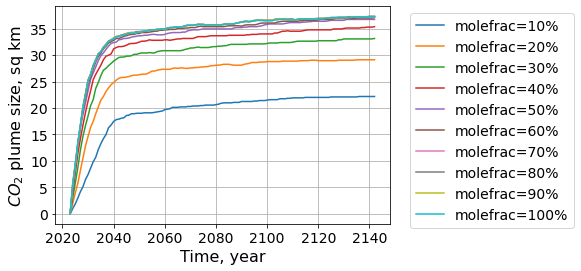

In [78]:
for ii,pp in enumerate(plumesize):
    plt.plot(time_query, pp, label=f'molefrac={ii+1}0%')
#     plt.plot(time_query, pp, color='b', alpha=0.5)
# plt.plot(time_query, plumesize[75], color='r', linewidth=3.0)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize = 14)
plt.xlabel('Time, year', fontsize=16)
plt.ylabel('$CO_2$ plume size, sq km', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()
    

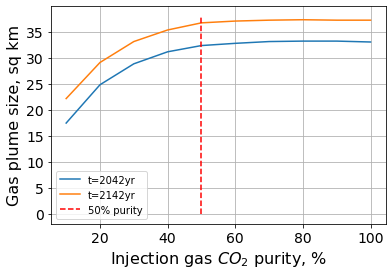

In [72]:
plt.plot(np.array(case_num[1:])*10, np.array(plumesize)[:,17], label='t=2042yr')
plt.plot(np.array(case_num[1:])*10, np.array(plumesize)[:,-1], label='t=2142yr')
plt.plot([50,50],[0,38],'r--', label='50% purity')
plt.legend()
plt.xlabel('Injection gas $CO_2$ purity, %', fontsize=16)
plt.ylabel('Gas plume size, sq km', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()
    

Time is 2142


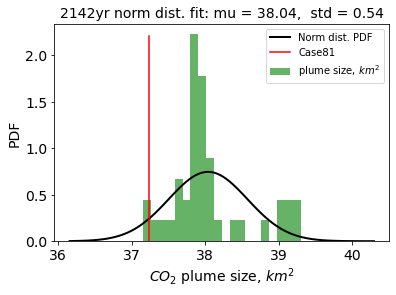

In [16]:
idx = 119

print(f'Time is {time_query[idx]}')

# Fit a normal distribution to the data:
mu, std = norm.fit(df_ps[df_ps['Time, yr']==2142][df_ps[df_ps['Time, yr']==2142]['Achieve']==1].sort_values(by=['Plume_size, sqkm'])['Plume_size, sqkm'])

x = np.linspace(min(df_ps[df_ps['Time, yr']==2142][df_ps[df_ps['Time, yr']==2142]['Achieve']==1].sort_values(by=['Plume_size, sqkm'])['Plume_size, sqkm'])-1, max(df_ps[df_ps['Time, yr']==2142][df_ps[df_ps['Time, yr']==2142]['Achieve']==1].sort_values(by=['Plume_size, sqkm'])['Plume_size, sqkm'])+1, 100)
p = norm.pdf(x, mu, std)
plt.hist(df_ps[df_ps['Time, yr']==2142][df_ps[df_ps['Time, yr']==2142]['Achieve']==1].sort_values(by=['Plume_size, sqkm'])['Plume_size, sqkm'], bins=20, density=True, alpha=0.6, color='g', label='plume size, $km^2$')
plt.plot(x, p, 'k', linewidth=2, label='Norm dist. PDF')
plt.plot([37.244, 37.244],[0,2.2], color='r',label='Case81')
plt.xlabel('$CO_2$ plume size, $km^2$', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
title = f"{time_query[idx]}yr norm dist. fit: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title, fontsize=14)
plt.legend()
plt.legend(prop={'size': 10})
plt.show()

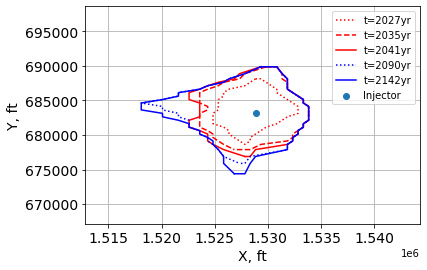

In [19]:
time_query4plume_outline = [2027,2035,2041,2090, 2142]
time_query4plume_outline_idx = np.array(time_query4plume_outline)-2023


# Plot CO2 plumes
col_profile = ['b','g','r','c','m','y']
col_profile2 = ['r:','r--','r','b:','b']

for n,i in enumerate(time_query4plume_outline_idx):
    plt.plot(cmgcalc.ijk2xyz(np.array(alloutlines[i][0])[:,1],X),cmgcalc.ijk2xyz(np.array(alloutlines[i][0])[:,0],Y),col_profile2[n])
    plt.plot(cmgcalc.ijk2xyz(np.array(alloutlines[i][1])[:,1],X),cmgcalc.ijk2xyz(np.array(alloutlines[i][1])[:,0],Y),col_profile2[n],label=f't={time_query4plume_outline[n]}yr')
# plt.gca().invert_yaxis()
plt.scatter(cmgcalc.ijk2xyz(16,X),cmgcalc.ijk2xyz(16,Y),label='Injector')
plt.xlabel('X, ft', fontsize=14)
plt.ylabel('Y, ft', fontsize=14)
plt.xlim([min(X),max(X)])
plt.ylim([min(Y),max(Y)])
plt.legend()
plt.legend(prop={'size': 10})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
# plt.savefig("MAML_tests.png",dpi=300)
plt.show()